In [1]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [178]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

(n_samples, n_features) = df.shape
print('n_samples ', n_samples)
print('n_features ', n_features)

n_samples  506
n_features  13


(506, 2)
2
y.shape  (506,)
loss  0.9451852504773298


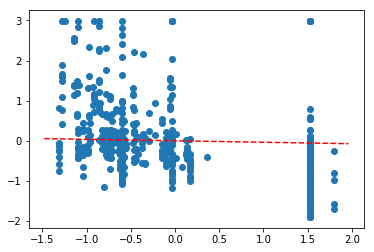

loss  0.6218706269024271


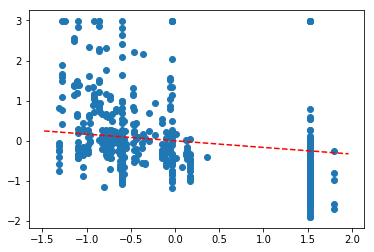

loss  0.506749527257423


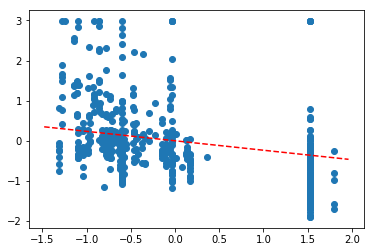

loss  0.4650858432778111


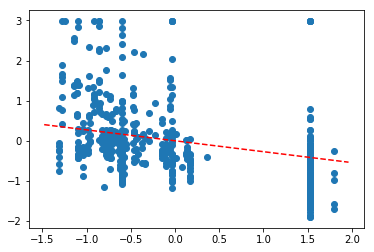

loss  0.4496390606435644


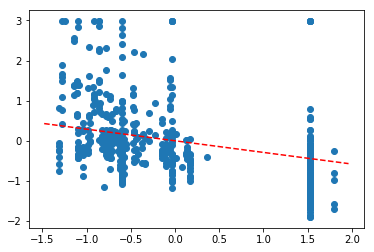

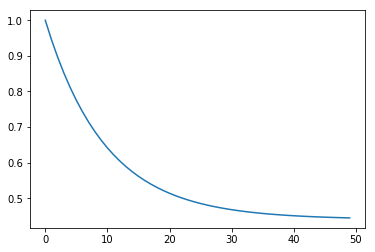

In [180]:
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random
%matplotlib inline

# X = df.values
X = df[["RM", "TAX"]].values
n_features = X.shape[1]
print(X.shape)
print(n_features)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) # normalize
X = np.c_[ X, np.ones(n_samples) ] # append a column of 1s as bias multiplier

y = target["MEDV"].values
y = (y - np.mean(y, axis=0)) / np.std(y, axis=0) # normalize
print('y.shape ', y.shape)

w = np.zeros(n_features + 1)
alpha = 0.02

epochs = 50
loss_history = []
for epoch in np.arange(epochs):
    y_hat = X @ w.transpose()
    error = y - y_hat
    dw = -2 * (error @ X) / n_samples
    w = w - alpha * dw
    
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    if (epoch - 1) % int(epochs/5) == 0:
        #print('w ', w, ' dw ', dw)
        print('loss ', loss)

        plt.figure()
        feature_index = 1
        plt.scatter(X[:, feature_index], y)
        
        axes = plt.gca()
        x_vals = np.array(axes.get_xlim()) 
        y_vals = w[-1] + w[feature_index] * x_vals #the line equation
        plt.plot(x_vals, y_vals, '--r')

        plt.show()
        
plt.figure()
plt.plot(loss_history)
plt.show()

In [176]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      